# EE0826 Control Systems
 
$$ Simulation\space 4 $$
$$ 2^{nd}\space order \space systems \space with\space complex\space conjugate\space poles $$
Prepared by: Güray Gürkan, PhD
Jan, 2019

## Effect of pole location on step response

A real-valued transfer function $G(s)$ is known to have a pole at $$ p_1 = -6 +8j$$

Since $G(s)$ is real-valued, the second pole should be the conjugate symmetric of the first pole:
$$ p_2 =p_1^* = -6 -8j$$

Then, the transfer function can be written as:

$$ G(s) = \frac {K}{(s-p_1)(s-p_2)} $$
or
$$ G(s)     = \frac {K}{s^2 - (p_1+p_2)s + p_1p_2}$$

Here, $p_1+p_2 = -12$ and $p_1p_2 = 100$. Thus;

$$ G(s)     = \frac {K}{s^2 +12s + 100}$$

If the final value of step response of $G(s)$ is 1, by using Final Value Theorem;

$$ \lim_{s \to 0} s \frac {G(s)}{s} = 1 \to G(0) = 1$$

Then

$$ G(0) = \frac{K}{100} = 1 \to K=100$$



## Simulation 1

In [9]:
%pylab inline

import control as ctl

G = ctl.tf(100, [1, 12, 100])

# or

G = ctl.tf(100, poly((-6+8j,-6-8j)))

print "G=",G

Populating the interactive namespace from numpy and matplotlib
G= 
       100
----------------
s^2 + 12 s + 100



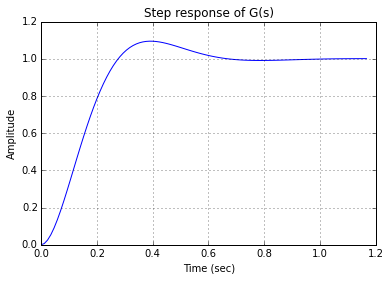

In [8]:
y,t = ctl.step(G)
plt.plot(t,y)
plt.grid(True)
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.title("Step response of G(s)")

## From time-domain step response behaviour specification to pole location

We want to observe a (stable) step response with

    - an oscillation frequency of 4 Hz

    - time constant (decay) of 2 seconds

What are pole locations?

What is G(s)?
 


** Answer :**

If the step response has an oscillatory behaviour, then it is at least of second order and has complex (conjugate) poles. Consider pole pair $p_1= \alpha + j\beta$ and $p_2 =\alpha - j\beta$. Referring to given oscillation frequency, we can state that:

$$ \beta =  \omega = 2\pi f_{osc} $$

For $ f_{osc}=4$ Hz, we have $\beta = 8\pi$. The relationship between $\alpha$ and time constant $\tau$ is:
$$ \alpha = - \frac{1}{\tau} = - 0.5$$
Thus,

$$ G(s)= \frac{K}{(s-(-0.5+j8\pi)(s-(-0.5+j8\pi))} $$

By using summation and product property, that is, $b = - (p_1 + p_2)$ and $c = p_1p_2$  :

$$ G(s) = \frac{K}{s^2 + s + (0.5^2 + 64\pi^2)}$$


$$ G(s) = \frac{K}{s^2 + s + 631.9}$$

If the step response is desired to have unit final value then:

$$ G(s) = \frac{631.9}{s^2 + s + 631.9}$$

## Simulation 2

In [27]:
alpha = -0.5
beta = 8*np.pi

c = alpha**2+beta**2
b = -2*alpha

G = ctl.tf(c,[1,b,c])

print "G=",G

G= 
     631.9
---------------
s^2 + s + 631.9



 ###  a) Result of Insufficient Sampling

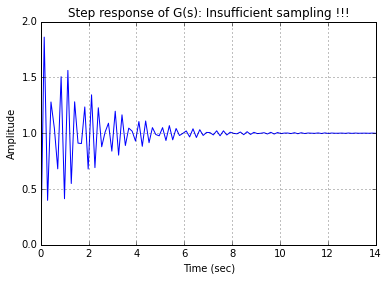

In [23]:
y,t = ctl.step(G)

plt.plot(t,y)
plt.grid(True)
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.title("Step response of G(s): Insufficient sampling !!!");

### b) Manual time vector entry

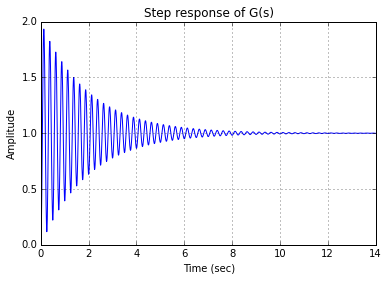

In [30]:
t = np.arange(0,14,0.01) # 10 ms sampling
y,t = ctl.step(G,t)

plt.plot(t,y)
plt.grid(True)
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.title("Step response of G(s)");

#### Zoomed View 

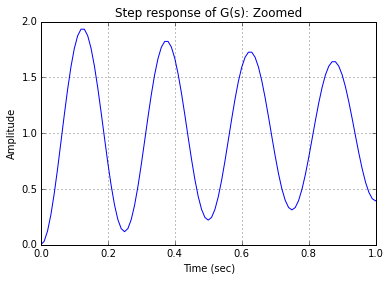

In [31]:
plt.plot(t,y)
plt.grid(True)
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.title("Step response of G(s): Zoomed")
plt.xlim(0,1);

## Question 

**How do we make the response faster (decay faster) with the same oscillation frequency?**

    -Time constant, should it be smaller or larger?

Let’s pick time constant  as 1 sec. New $G(s)$ is 
$$ G(s) = \frac{K}{s^2+ 2s + (1 + 64\pi^2)} $$




### Simulation 3

In [28]:
alpha = -1
beta = 8*np.pi

c = alpha**2 + beta**2
b = -2*alpha

G2 = ctl.tf(c,[1,b,c])

print "G2=",G2

G2= 
      632.7
-----------------
s^2 + 2 s + 632.7



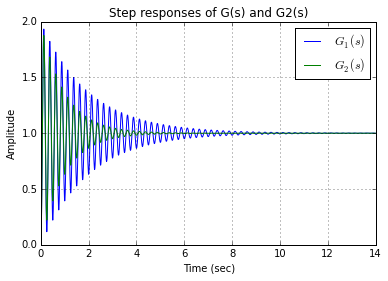

In [34]:
t = np.arange(0,14,0.01) # 10 ms sampling
y2,t2 = ctl.step(G2,t)

plt.plot(t,y)
plt.plot(t2,y2)
plt.grid(True)
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.title("Step responses of G(s) and G2(s)");
plt.legend(("$G_1(s)$","$G_2(s)$"))

(0, 4)

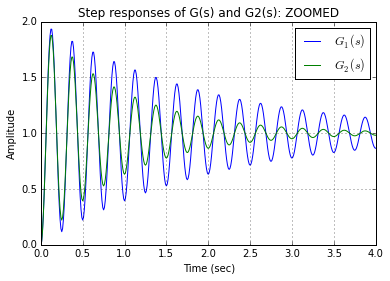

In [36]:
t = np.arange(0,14,0.01) # 10 ms sampling
y2,t2 = ctl.step(G2,t)

plt.plot(t,y)
plt.plot(t2,y2)
plt.grid(True)
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.title("Step responses of G(s) and G2(s): ZOOMED");
plt.legend(("$G_1(s)$","$G_2(s)$"))
plt.xlim((0,4))

## Result 
As the figure reveals, $G_2(s)$ decays faster than $G_1(s)$.However they have the same oscillation frequency since the imaginary component of their poles are equal.